In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import display, HTML
import datetime
from plotnine import *

%matplotlib inline
plt.rcParams.update({'xtick.direction': 'out', 'axes.spines.top': False, 'axes.spines.right': False})

df1 = pd.read_csv('dataverse_files/main_data.tab', sep="\t")
df1 = df1.dropna(axis=0, subset='time')

In [2]:
model = smf.ols('repression ~ C(hostcity)*time + lnpop_1970 + literacy_avg + lnrebact1974 +\
                    lnrepression70_77 + C(zone2) + C(zone3) + C(zone4) + C(zone5)', data=df1)\
                .fit(cov_type='HC1')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     13.19
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.59e-25
Time:                        15:27:42   Log-Likelihood:                 48309.
No. Observations:               56394   AIC:                        -9.659e+04
Df Residuals:                   56382   BIC:                        -9.649e+04
Df Model:                          11                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0045      0.005     -0.975      0.330      -0.013       0.005
C(hostcity)[T.1.0]          0.1180      0.037      3.187      0.001       0.045       0.191
C(zone2)[T.1]              -0.0265      0.003     -8.078      0.000      -0.033      -0.020
C(zone3)[T.1]              -0.0210      0.003     -7.578      0.000      -0.026      -0.016
C(zone4)[T.1]              -0.0173      0.006     -2.724      0.006      -0.030      -0.005
C(zone5)[T.1]              -0.0169      0.002     -7.924      0.000      -0.021      -0.013
time                       -0.0009      0.001     -0.891      0.373      -0.003       0.001
C(hostcity)[T.1.0]:time     0.0625      0.061      1.027      0.305      -0.057       0.182
lnpop_1970                  0.0057      0.001      6.475      0.000       0.004       0.007
literacy_avg               -0.0425      0.005     -8.355      0.000      -0.053      -0.033
lnrebact1974               -0.0025      0.000     -5.734      0.000      -0.003      -0.002
lnrepression70_77           0.0055      0.001      7.113      0.000       0.004       0.007
==============================================================================
Omnibus:                   145241.449   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3536940890.970
Skew:                          29.535   Prob(JB):                         0.00
Kurtosis:                    1228.460   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [3]:
s = model.get_prediction().summary_frame(alpha=0.05)
s

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
59,-0.005509,0.001669,-0.008780,-0.002239,-0.206919,0.195900
60,-0.005519,0.001664,-0.008780,-0.002258,-0.206928,0.195890
61,-0.005528,0.001659,-0.008780,-0.002277,-0.206937,0.195881
62,-0.005538,0.001654,-0.008780,-0.002295,-0.206947,0.195871
63,-0.005547,0.001650,-0.008780,-0.002314,-0.206956,0.195862
...,...,...,...,...,...,...
133367,-0.012355,0.001608,-0.015507,-0.009204,-0.213763,0.189052
133368,-0.012365,0.001611,-0.015523,-0.009207,-0.213772,0.189043
133369,-0.012374,0.001615,-0.015539,-0.009209,-0.213782,0.189033
133370,-0.012384,0.001618,-0.015556,-0.009212,-0.213792,0.189024


In [4]:
df = df1.reset_index()

In [5]:
f = model.fittedvalues.to_frame()
f = f.rename(columns={0: 'pred'})
f

,pred
59,-0.005509
60,-0.005519
61,-0.005528
62,-0.005538
63,-0.005547
...,...
133367,-0.012355
133368,-0.012365
133369,-0.012374
133370,-0.012384


In [6]:
0.237827 + 0.302462 - 0.173192

0.367097

In [7]:
p = pd.concat([s, f, df1], axis=1)
#p = pd.concat([f, df1], axis=1)
p = p.dropna(subset='pred')
p

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred,muni,id,prov,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
59,-0.005509,0.001669,-0.008780,-0.002239,-0.206919,0.195900,-0.005509,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
60,-0.005519,0.001664,-0.008780,-0.002258,-0.206928,0.195890,-0.005519,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
61,-0.005528,0.001659,-0.008780,-0.002277,-0.206937,0.195881,-0.005528,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
62,-0.005538,0.001654,-0.008780,-0.002295,-0.206947,0.195871,-0.005538,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
63,-0.005547,0.001650,-0.008780,-0.002314,-0.206956,0.195862,-0.005547,adolfo alsina,1.0,buenos aires,...,0,0,0,1,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133367,-0.012355,0.001608,-0.015507,-0.009204,-0.213763,0.189052,-0.012355,trancas,498.0,tucuman,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133368,-0.012365,0.001611,-0.015523,-0.009207,-0.213772,0.189043,-0.012365,trancas,498.0,tucuman,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133369,-0.012374,0.001615,-0.015539,-0.009209,-0.213782,0.189033,-0.012374,trancas,498.0,tucuman,...,0,1,0,0,0,0,0,NaN,NaN,NaN
133370,-0.012384,0.001618,-0.015556,-0.009212,-0.213792,0.189024,-0.012384,trancas,498.0,tucuman,...,0,1,0,0,0,0,0,NaN,NaN,NaN


In [8]:
p.loc[p['hostcity'] == 1.0]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,pred,muni,id,prov,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
11583,0.167319,0.036900,0.094996,0.239641,-0.046657,0.381295,0.167319,general pueyrredon,44.0,buenos aires,...,0,0,0,0,0,0,0,1.0,1.0,1.0
11584,0.167935,0.036478,0.096439,0.239430,-0.045763,0.381632,0.167935,general pueyrredon,44.0,buenos aires,...,0,0,0,0,0,0,0,1.0,1.0,1.0
11585,0.168551,0.036061,0.097872,0.239230,-0.044875,0.381976,0.168551,general pueyrredon,44.0,buenos aires,...,0,0,0,0,0,0,0,1.0,1.0,1.0
11586,0.169167,0.035650,0.099294,0.239040,-0.043994,0.382327,0.169167,general pueyrredon,44.0,buenos aires,...,0,0,0,0,0,0,0,1.0,1.0,1.0
11587,0.169783,0.035245,0.100704,0.238861,-0.043119,0.382684,0.169783,general pueyrredon,44.0,buenos aires,...,0,0,0,0,0,0,0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119431,0.221412,0.048910,0.125549,0.317274,-0.001623,0.444447,0.221412,rosario,446.0,santa fe,...,0,0,0,0,0,0,0,1.0,1.0,1.0
119432,0.222028,0.049434,0.125139,0.318916,-0.001450,0.445505,0.222028,rosario,446.0,santa fe,...,0,0,0,0,0,0,0,1.0,1.0,1.0
119433,0.222643,0.049959,0.124726,0.320561,-0.001283,0.446570,0.222643,rosario,446.0,santa fe,...,0,0,0,0,0,0,0,1.0,1.0,1.0
119434,0.223259,0.050486,0.124309,0.322210,-0.001120,0.447639,0.223259,rosario,446.0,santa fe,...,0,0,0,0,0,0,0,1.0,1.0,1.0


/var/folders/gq/cdzslxdn7dg5ln3bb9cklssr0000gn/T/ipykernel_1299/1485802998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/gq/cdzslxdn7dg5ln3bb9cklssr0000gn/T/ipykernel_1299/1485802998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


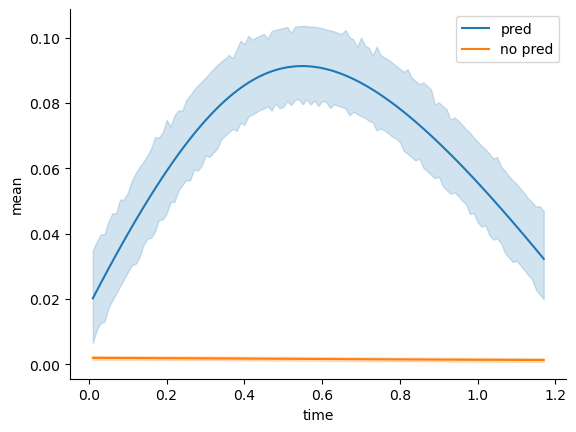

In [9]:
ph = p.loc[p['hostcity'] == 1.0]
pnh = p.loc[p['hostcity'] == 0.0]
ph['mean'] -= abs(ph['mean_ci_upper']) - abs(ph['mean_ci_lower'])
pnh['mean'] -= abs(pnh['mean_ci_upper']) - abs(pnh['mean_ci_lower'])
ax = sns.lineplot(data=ph, x='time', y='mean', label='pred', errorbar=('ci', 95))
ax = sns.lineplot(data=pnh, x='time', y='mean', label='no pred', errorbar=('ci', 95))

In [10]:
all_df1 = df1.loc[df1['matched_simple'] == 1.0]

In [11]:
model1 = smf.ols('repression ~ C(hostcity)*time + lnpop_1970 + literacy_avg + lnrebact1974 +\
                    lnrepression70_77 + C(zone2) + C(zone3) + C(zone4) + C(zone5)', \
                        data=df1).fit(cov_type='HC1')
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     13.19
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           1.59e-25
Time:                        15:27:45   Log-Likelihood:                 48309.
No. Observations:               56394   AIC:                        -9.659e+04
Df Residuals:                   56382   BIC:                        -9.649e+04
Df Model:                          11                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0045      0.005     -0.975      0.330      -0.013       0.005
C(hostcity)[T.1.0]          0.1180      0.037      3.187      0.001       0.045       0.191
C(zone2)[T.1]              -0.0265      0.003     -8.078      0.000      -0.033      -0.020
C(zone3)[T.1]              -0.0210      0.003     -7.578      0.000      -0.026      -0.016
C(zone4)[T.1]              -0.0173      0.006     -2.724      0.006      -0.030      -0.005
C(zone5)[T.1]              -0.0169      0.002     -7.924      0.000      -0.021      -0.013
time                       -0.0009      0.001     -0.891      0.373      -0.003       0.001
C(hostcity)[T.1.0]:time     0.0625      0.061      1.027      0.305      -0.057       0.182
lnpop_1970                  0.0057      0.001      6.475      0.000       0.004       0.007
literacy_avg               -0.0425      0.005     -8.355      0.000      -0.053      -0.033
lnrebact1974               -0.0025      0.000     -5.734      0.000      -0.003      -0.002
lnrepression70_77           0.0055      0.001      7.113      0.000       0.004       0.007
==============================================================================
Omnibus:                   145241.449   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3536940890.970
Skew:                          29.535   Prob(JB):                         0.00
Kurtosis:                    1228.460   Cond. No.                         350.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [12]:
s = model1.get_prediction(all_df1).summary_frame(alpha=0.05)
#s = s.apply(lambda x: np.exp(x))
s

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.043282,0.004370,0.034717,0.051847,-0.158283,0.244847
1,0.043273,0.004368,0.034712,0.051833,-0.158292,0.244838
2,0.043263,0.004365,0.034708,0.051819,-0.158301,0.244828
3,0.043254,0.004363,0.034703,0.051805,-0.158310,0.244818
4,0.043245,0.004361,0.034698,0.051791,-0.158319,0.244809
...,...,...,...,...,...,...
4090,0.036493,0.003995,0.028663,0.044323,-0.165042,0.238028
4091,0.036484,0.003995,0.028655,0.044313,-0.165051,0.238019
4092,0.036474,0.003994,0.028646,0.044302,-0.165061,0.238009
4093,0.036465,0.003993,0.028638,0.044292,-0.165070,0.238000


In [13]:
f = model1.fittedvalues.to_frame()
f = f.rename(columns={0: 'pred'})
f = f.apply(lambda x: np.exp(x))
f

,pred
59,0.994506
60,0.994496
61,0.994487
62,0.994478
63,0.994468
...,...
133367,0.987721
133368,0.987711
133369,0.987702
133370,0.987693


In [14]:
all_df1

,muni,id,prov,id_prov,muniprov,repression,lnrepression,dumrepression,hostcity,hostcitynum,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
863,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
864,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
865,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
866,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
867,almirante brown,4.0,buenos aires,1.0,almirante brown buenos aires,0.0,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129615,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129616,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129617,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN
129618,capital,484.0,tucuman,24.0,capital tucuman,0.0,0.0,0.0,0.0,NaN,...,0,1,0,0,0,0,0,1.0,1.0,NaN


In [15]:
all_df1 = all_df1.reset_index()

In [16]:
#p = pd.concat([s, f, df1], axis=1)
p = pd.concat([s, all_df1], axis=1)
p

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,index,muni,id,prov,...,subzone12,subzone13,subzone14,subzone15,subzone16,subzone17,subzone18,matched_simple,matched_allhosts,matched_nocapfed
0,0.043282,0.004370,0.034717,0.051847,-0.158283,0.244847,863,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
1,0.043273,0.004368,0.034712,0.051833,-0.158292,0.244838,864,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
2,0.043263,0.004365,0.034708,0.051819,-0.158301,0.244828,865,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
3,0.043254,0.004363,0.034703,0.051805,-0.158310,0.244818,866,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
4,0.043245,0.004361,0.034698,0.051791,-0.158319,0.244809,867,almirante brown,4.0,buenos aires,...,0,0,0,0,0,0,0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090,0.036493,0.003995,0.028663,0.044323,-0.165042,0.238028,129615,capital,484.0,tucuman,...,0,1,0,0,0,0,0,1.0,1.0,NaN
4091,0.036484,0.003995,0.028655,0.044313,-0.165051,0.238019,129616,capital,484.0,tucuman,...,0,1,0,0,0,0,0,1.0,1.0,NaN
4092,0.036474,0.003994,0.028646,0.044302,-0.165061,0.238009,129617,capital,484.0,tucuman,...,0,1,0,0,0,0,0,1.0,1.0,NaN
4093,0.036465,0.003993,0.028638,0.044292,-0.165070,0.238000,129618,capital,484.0,tucuman,...,0,1,0,0,0,0,0,1.0,1.0,NaN


/var/folders/gq/cdzslxdn7dg5ln3bb9cklssr0000gn/T/ipykernel_1299/965013644.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


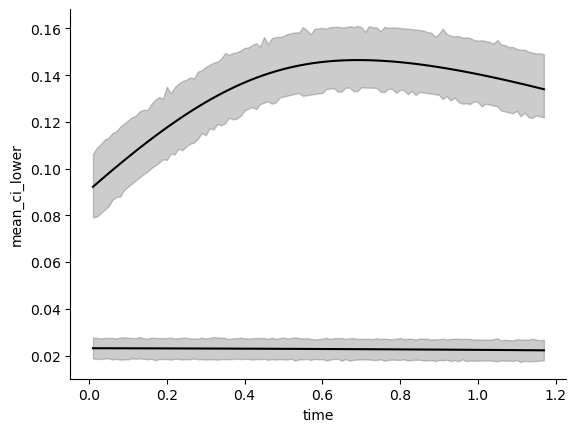

In [64]:
ph = p.loc[p['hostcity'] == 1.0]
pnh = p.loc[p['hostcity'] == 0.0]

# ph['mean'] -= abs(ph['mean_ci_upper']) - abs(ph['mean_ci_lower'])
# pnh['mean'] -= abs(pnh['mean_ci_upper']) - abs(pnh['mean_ci_lower'])

# ph['mean_ci_upper'] -= (ph['mean_ci_lower'])
pnh['mean_ci_upper'] -= (pnh['mean_ci_lower'])

ax = sns.lineplot(data=ph, x='time', y='mean_ci_lower', errorbar=('ci', 95), c='#000000')
ax = sns.lineplot(data=pnh, x='time', y='mean_ci_lower', errorbar=('ci', 95), c='#000000')

# ax = sns.lineplot(data=pnh, x='time', y='mean_ci_upper', errorbar=('ci', 95), c='#000000')

#ax = sns.lineplot(data=pnh, x='time', y='mean', errorbar=('ci', 95), c='#000000')
# ax.lines[1].set_linestyle("--")

In [18]:
ps = p[['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'time', 'hostcity', 'date']]

In [19]:
pivot_ps = ps.pivot_table(index='date', columns='hostcity',\
               values=['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'time', 'date'])
pivot_ps

mean           mean_ci_lower           mean_ci_upper  \
hostcity         0.0       1.0           0.0       1.0           0.0   
date                                                                   
1978-03-01  0.030513  0.164276      0.023141  0.092218      0.037886   
1978-03-02  0.030504  0.164892      0.023137  0.093667      0.037871   
1978-03-03  0.030495  0.165508      0.023133  0.095106      0.037856   
1978-03-04  0.030485  0.166124      0.023129  0.096534      0.037841   
1978-03-05  0.030476  0.166740      0.023126  0.097951      0.037826   
...              ...       ...           ...       ...           ...   
1978-06-21  0.029460  0.233260      0.022293  0.135624      0.036626   
1978-06-22  0.029450  0.233876      0.022281  0.135222      0.036619   
1978-06-23  0.029441  0.234492      0.022269  0.134817      0.036612   
1978-06-24  0.029431  0.235108      0.022258  0.134407      0.036605   
1978-06-25  0.029422  0.235724      0.022246  0.133994      0.036598   

                       mean_se            time        
hostcity         1.0       0.0       1.0   0.0   1.0  
date                                                  
1978-03-01  0.236335  0.003762  0.036765  0.01  0.01  
1978-03-02  0.236117  0.003759  0.036340  0.02  0.02  
1978-03-03  0.235910  0.003756  0.035920  0.03  0.03  
1978-03-04  0.235714  0.003753  0.035506  0.04  0.04  
1978-03-05  0.235529  0.003750  0.035097  0.05  0.05  
...              ...       ...       ...   ...   ...  
1978-06-21  0.330895  0.003657  0.049815  1.13  1.13  
1978-06-22  0.332529  0.003658  0.050334  1.14  1.14  
1978-06-23  0.334167  0.003659  0.050856  1.15  1.15  
1978-06-24  0.335808  0.003660  0.051379  1.16  1.16  
1978-06-25  0.337454  0.003661  0.051904  1.17  1.17  

[117 rows x 10 columns]

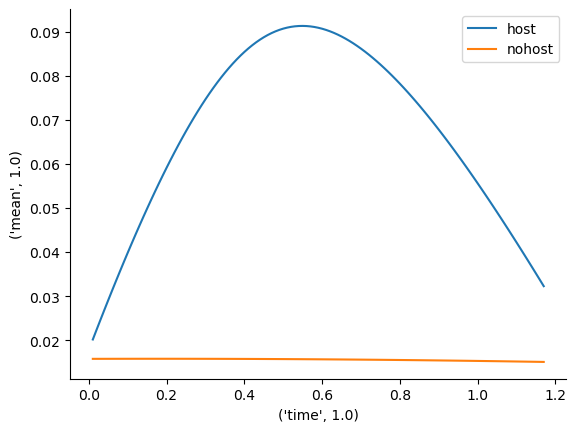

In [20]:
pivot_ps.loc[:, ('mean', 1.0)] -= abs(pivot_ps.loc[:, ('mean_ci_upper', 1.0)]) \
            - abs(pivot_ps.loc[:, ('mean_ci_lower', 1.0)])
pivot_ps.loc[:, ('mean', 0.0)] -= abs(pivot_ps.loc[:, ('mean_ci_upper', 0.0)]) \
            - abs(pivot_ps.loc[:, ('mean_ci_lower', 0.0)])

ax = sns.lineplot(data=pivot_ps, x=pivot_ps.loc[:, ('time', 1.0)], y=pivot_ps.loc[:, ('mean', 1.0)], label="host")
ax = sns.lineplot(data=pivot_ps, x=pivot_ps.loc[:, ('time', 1.0)], y=pivot_ps.loc[:, ('mean', 0.0)], label="nohost")